In [15]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Pruebas

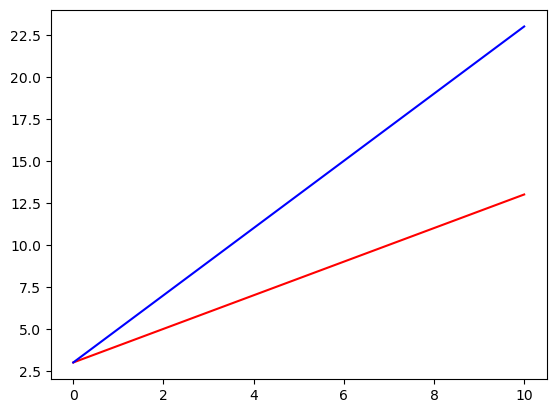

In [16]:
# y = 1*x + 3
# 0 < x < 10
a = 1
b = 3

lx = np.linspace(0, 10, 200)
ly = a*lx + b

ax = plt.subplot(111)
ax.plot(lx, ly,color="red")
# ax.set_ylim([0,15])

a = 2
b = 3

lx = np.linspace(0, 10, 200)
ly = a*lx + b

ax.plot(lx, ly, color="blue")

# Aqui empieza el ejercicio

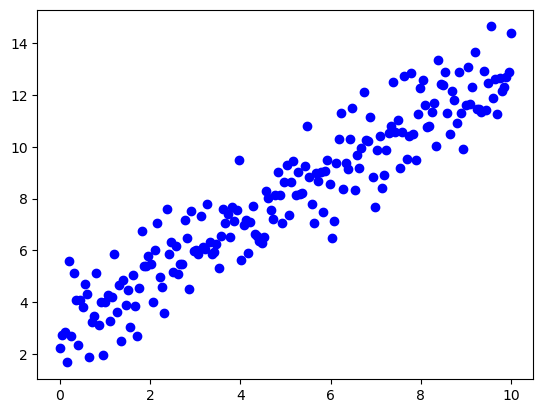

In [17]:
# y = 1*x + 3
# y = a*x + b
# 0 < x < 10

a = 1
b = 3
num = 200

lx = np.linspace(0, 10, num)
ly = a*lx + b

ruido = np.random.randn(num)
ly = ly + ruido

# Given only lx and ly, find a and b
ax = plt.subplot(111)
ax.scatter(lx,ly,color="blue")
# ax.set_ylim([0,15])

- Solamente con la funcion: y = a*x + b (ecuacion de la recta)
- Encuentra a y b
- Solo sabemos la lista de x (lx) y la lista de y (ly)


In [18]:
# devuelve el valor de y en base a n valores de x
def predice(x:np.ndarray):
    return a*x + b

# Se pasan las 'x' y las 'y' reales y devuelve el array de errores de cada x
def error(x:np.ndarray, y):
    y_hat = predice(x)
    err = y_hat -y
    return err

# se le pasan las 'x' y las 'y' reales y devuelve el coste cuadrático medio
# 1(2n) * Σ (yi_hat -y)^2
def coste(x,y):
    err = error(x,y)
    c = err**2
    c = c.mean()
    c = c/2
    # print(((err**2).mean())/2)
    return c

# 1/n Σ(yi_hat - yi)* xi
def derivada_coste_respecto_a(x, y):
    err = error(x, y)
    d = err*x
    d = d.mean()
    return d

def deriva_coste_repecto_a_aprox(x, y):
    global a
    inc = 0.001
    c1 = coste(x, y)
    a = a + inc
    c2 = coste(x, y)
    a = a - inc
    d = (c2-c1)/inc
    return d

# 1/n Σ(yi_hat - yi)
def derivada_coste_respecto_b(x, y):
    d = error(x, y)
    d = d.mean()
    return d

def deriva_coste_repecto_b_aprox(x, y):
    global b
    inc = 0.001
    c1 = coste(x, y)
    b = b + inc
    c2 = coste(x, y)
    b = b - inc
    d = (c2-c1)/inc
    return d

# r2 o coeficiente de determinación
def calc_accuracy(x, y):
    err = error(x, y)
    numerador = (err ** 2).sum()
    denominador = ((y - y.mean()) **2).sum()
    return 1 - numerador/denominador

pru_x  [0.50251256 2.51256281 5.02512563]
pru_y  [3.79683445 5.15452408 9.28983416]
estimados por el modelo  [14.02512563 34.12562814 59.25125628]
error  [10.22829118 28.97110406 49.96142212]
coste  573.3477518367745


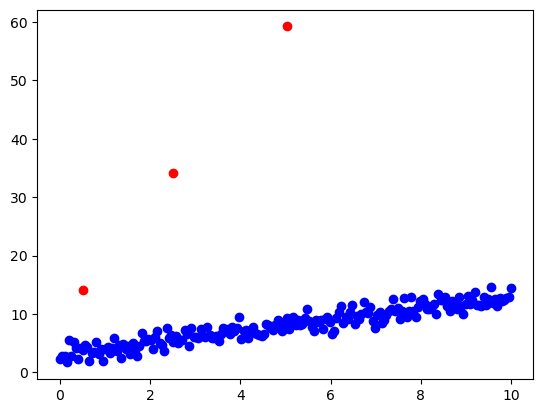

In [19]:
a = 10
b = 9

plt.scatter(lx, ly, color="b")
pru_x = np.array([lx[10], lx[50], lx[100]])
pru_y = np.array([ly[10], ly[50], ly[100]])

y_hat = predice(pru_x)
plt.scatter(pru_x, y_hat, color="r")
le = error(pru_x, pru_y )
c = coste(pru_x, pru_y)
print("pru_x ", pru_x)
print("pru_y ", pru_y)
print("estimados por el modelo ", y_hat)
print("error ", le)
print("coste ", c)

In [20]:
#pru_x = np.array([lx[10], lx[50], lx[100]])
#pru_y = np.array([ly[10], ly[50], ly[100]])
pru_x = lx
pru_y = ly
lr = 0.01
a = 10
b = 9

In [21]:
# def fit(x_train, y_train, lr = 0.01, epochs = 100):
#     global a, b
#     la = []
#     lb = []
#     lloss = []
#     for _ in range(epochs):
#         da = derivada_coste_respecto_a(x_train, y_train)
#         db = derivada_coste_respecto_b(x_train, y_train)
#         a = a - lr*da
#         b = b - lr*db
#         loss = coste(pru_x, pru_y)
#         la.append(a); lb.append(b); lloss.append(loss)
#         # print(f"a: {a}  b: {b} loss: {loss}")
#     return lloss, la, lb

def fit(x_train, y_train, batch_size=None, lr = 0.01,
              epochs=100, x_test = None, y_test = None):
  global a, b
  la = []
  lb = []
  lloss = []
  lloss_test = []
  if batch_size is None: batch_size = len(x_train)
  nbatchs = len(x_train)//batch_size

  for _ in range(epochs):
    # barajar
    laux = [i for i in range(len(x_train))]
    random.shuffle(laux)
    x_new = np.array([x_train[i] for i in laux])
    y_new = np.array([y_train[i] for i in laux])
    x_train = x_new
    y_train = y_new

    for lote in range(nbatchs):
      sl1 = lote*batch_size
      sl2 = sl1 + batch_size
      x_t = x_train[sl1:sl2]
      y_t = y_train[sl1:sl2]
      da = derivada_coste_respecto_a(x_t, y_t)
      db = derivada_coste_respecto_b(x_t, y_t)
      a = a - lr*da
      b = b - lr*db
      loss = coste(x_t, y_t)
      loss_test = 0
      if x_test is not None: loss_test = coste(x_test, y_test)
      la.append(a); lb.append(b); lloss.append(loss); lloss_test.append(loss_test)
      #print(f"a: {a}  b: {b} loss: {loss}")
  return lloss, lloss_test, la, lb

a: 1.0033742823010177  b: 3.0402940688623663 loss: 0.5472224487039229 r2 = 0.8893054423171559


(0.0, 10.0)

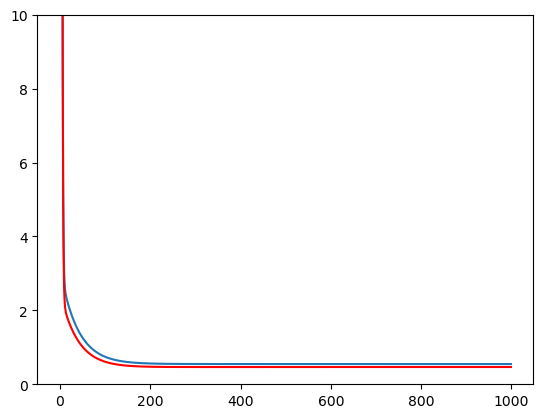

In [22]:
a = 10
b = 9

lg = int(0.8 * len(lx))

# lx_train = lx[:lg]
# ly_train = ly[:lg]
# lx_test = lx[lg:]
# ly_test = ly[lg:]


# lloss, lloss_test, la, lb = fit(lx_train, ly_train, lr=0.05, epochs=5000,
#                                 batch_size=None, x_test = lx_test, y_test = ly_test)
# print(f"a: {la[-1]}  b: {lb[-1]} loss: {lloss[-1]} r2 = {calc_accuracy(lx, ly)}")

# plt.plot(range(len(lloss)), lloss)
# plt.plot(range(len(lloss_test)), lloss_test)

laux = [i for i in range(len(lx))]
random.shuffle(laux)
x_n = np.array([lx[i] for i in laux])
y_n = np.array([ly[i] for i in laux])

lx_train = x_n[:lg]
ly_train = y_n[:lg]
lx_test = x_n[lg:]
ly_test = y_n[lg:]

lloss, lloss_test, la, lb = fit(lx_train, ly_train, lr=0.05, epochs=1000,
                                batch_size=None, x_test = lx_test, y_test = ly_test)

print(f"a: {la[-1]}  b: {lb[-1]} loss: {lloss[-1]} r2 = {calc_accuracy(lx_test, ly_test)}")

plt.plot(range(len(lloss)), lloss)
plt.plot(range(len(lloss_test)), lloss_test, color="r")
plt.ylim(0,10)

In [23]:
c_train = coste(lx_train, ly_train)
c_test = coste(lx_test, ly_test)
r2_train = calc_accuracy(lx_train, ly_train)
r2_test = calc_accuracy(lx_test, ly_test)
print(f"c_train: {c_train} c_test: {c_test} r2_train: {r2_train} r2_test: {r2_test}")

c_train: 0.5472224487039229 c_test: 0.46713053167535 r2_train: 0.8869721027558133 r2_test: 0.8893054423171559


1.0033742823010177 3.0402940688623663 [ 0 10] [ 3.04029407 13.07403689]


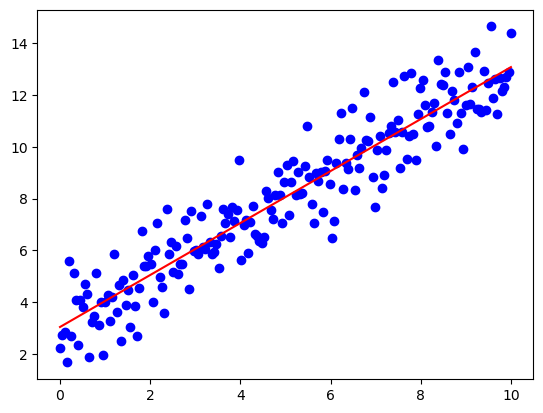

In [24]:
plt.scatter(lx, ly, color="b")
xpru = np.array([0, 10])
ypru = predice(xpru)
print(a, b, xpru, ypru)
plt.plot(xpru, ypru, color="r")

In [25]:
# lloss, la, lb = fit(lx, ly, epochs=1000)
# plt.plot(range(len(lloss)), lloss)

1.0033742823010177 3.0402940688623663 [ 0 10] [ 3.04029407 13.07403689]


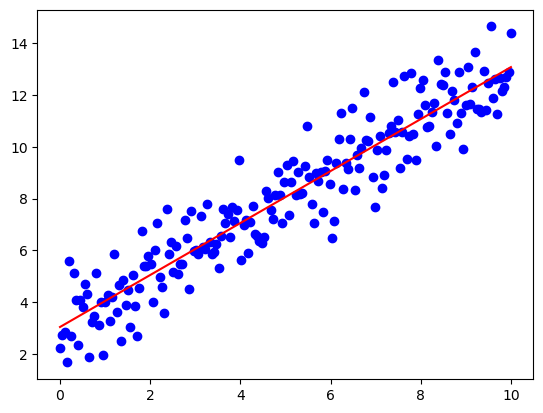

In [26]:
plt.scatter(lx, ly, color="b")
xpru = np.array([0, 10])
ypru = predice(xpru)
print(a, b, xpru, ypru)
plt.plot(xpru, ypru, color="r")

In [27]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')


def drawframe(n):
    global line
    if(n < len(la)):
      a1 = la[n]
      b1 = lb[n]
      x1 = [0, 10]
      y1 = [b1, 10*a1 + b1]
      line.set_data(x1, y1)
    #ax.set_title(f'epoch = {n/len(x):4d}'.format(n))
    return (line,)  #OJO!!! hay que retornar una tupla!!!!

global line
def dibuja_evolucion():
  global line
  fig = plt.figure()
  ax = plt.axes()
  line,  = ax.plot([0, 10], [b, 10*a + b], color="y")
  ax.scatter(lx, ly)
  # blit=True re-draws only the parts that have changed.
  anim = animation.FuncAnimation(fig, drawframe, frames=len(la)-1, interval=5, blit=False, repeat=False)
  return anim

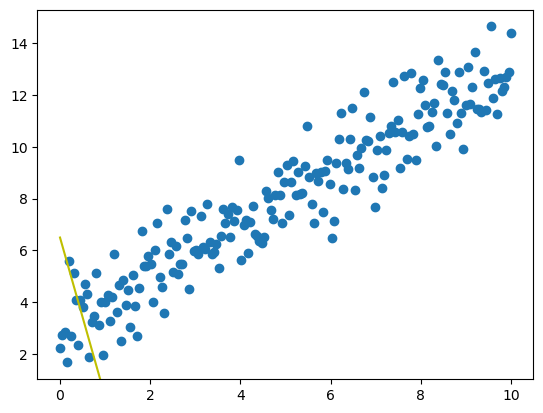

In [29]:
anim = dibuja_evolucion()
anim